# Using kernel SVMs

Kernels can be used to solve highly nonlinear problems with SVMs.

Using them in such way is called the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method#Mathematics:_the_kernel_trick).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, FloatSlider, Dropdown

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics.regression import mean_squared_error

# Fitting RBF SVM to sine function

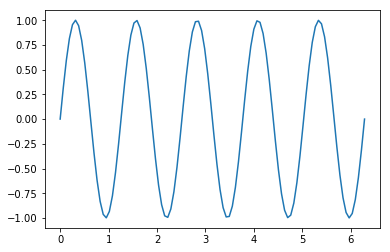

In [2]:
x = np.linspace(0, 2 * np.pi, 100).reshape(-1,1)
y = np.sin(5 * x).reshape(-1)

plt.plot(x, y)
plt.show()

In [3]:
def plot_svr(gamma, C):
  svr = SVR(kernel='rbf', gamma=gamma, C=C)  
  svr.fit(x, y)
  
  y_pred = svr.predict(x)
  
  print('MSE:', mean_squared_error(y, y_pred))
  plt.plot(x, y, label='True y')
  plt.plot(x, y_pred, label='Model y')
  plt.legend(loc='upper right') 
  plt.show()

As we can see, RVF kernel SVM can fit sine function almost arbitrarily well.

MSE: 0.00543299436621


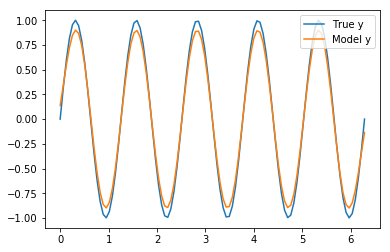

In [4]:
plot_svr(gamma=5, C=1)

In [5]:
interact(plot_svr,
        gamma=FloatSlider(min=0.001, max=10, step=0.01, value=1),
        C = FloatSlider(min=1, max=100, step=0.5, value=1))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_svr>

## 

# RBF Kernel for nonlinear classification

In [6]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

h = .02  # step size in the mesh

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = {'moons': make_moons(noise=0.3, random_state=0),
            'circles': make_circles(noise=0.2, factor=0.5, random_state=1),
            'linear': linearly_separable} 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over datasets
def plot_svm_classification(dataset_name, gamma, C):
    svc = SVC(gamma=gamma, C=C)
    figure = plt.figure(figsize=(12, 9))
    # preprocess dataset, split into training and test part
    X, y = datasets[dataset_name]
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #ax = plt.subplot()
    svc.fit(X_train, y_train)
    score = svc.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    plt.title('gamma: {}, \nC: {}\n Score \n Train:{} Test:{}'.format(gamma, C, svc.score(X_train, y_train), score), fontsize=15)
    plt.show()


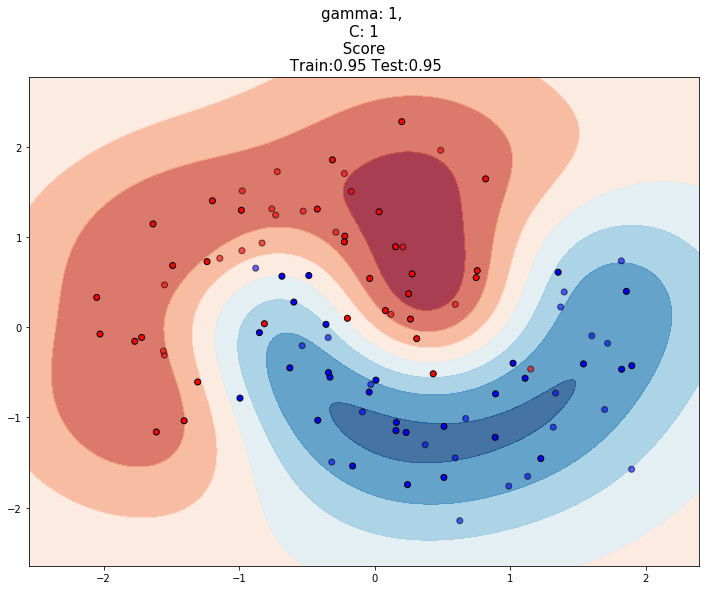

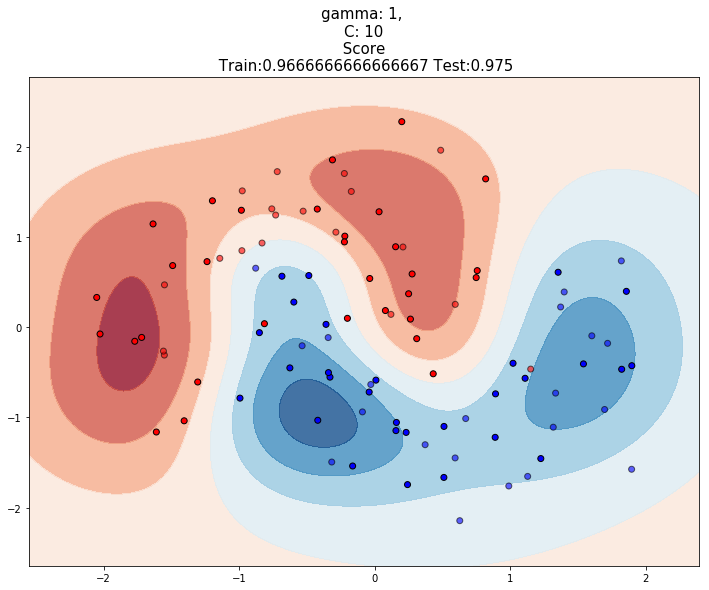

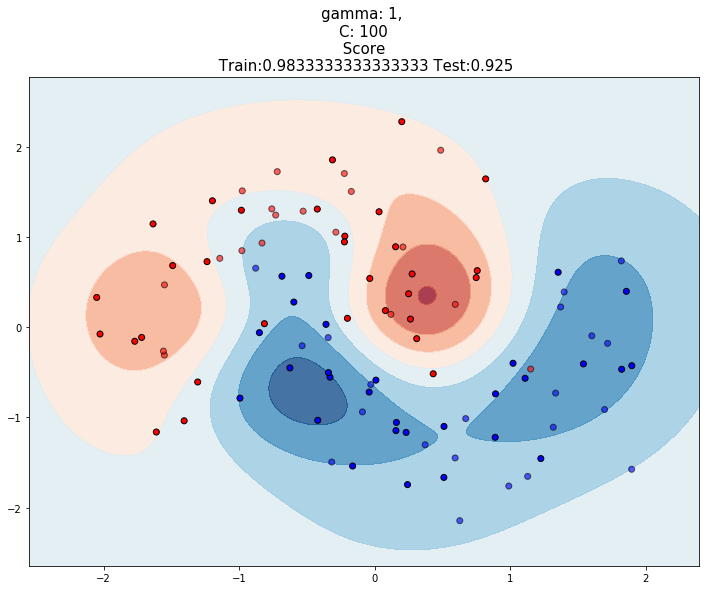

In [7]:
plot_svm_classification('moons', gamma=1, C=1)

plot_svm_classification('moons', gamma=1, C=10)

plot_svm_classification('moons', gamma=1, C=100)

In [8]:
interact(
  plot_svm_classification,
  dataset_name=Dropdown(
    options=list(datasets.keys())),
  gamma=FloatSlider(min=0.001, max=10, step=0.01, value=1),
  C = FloatSlider(min=1, max=100, step=0.5, value=1))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_svm_classification>